<a href="https://colab.research.google.com/github/GabrielCdev/boston_housing_prices/blob/main/Housing_Prices_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio final

##Previsão de preços imobiliários - Regressão linear

Base para a atividade: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

###....:::: Membros ::::....
Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

##Objetivo:

O objetivo desta análise é prever os preços de vendas de imóveis, a partir de um modelo de regressão linear, com base nas características da casa, como área, quantidade de quartos, banheiros e localização.


## Descrição dos atributos

price: preço

area: área

bedrooms: quartos

bathrooms: banheiros

stories: andares

mainroad: estrada principal

guestroom: quarto de hóspedes

basement: porão

hotwaterheating: aquecimento de água

airconditioning: ar condicionado

parking: estacionamento

prefarea: área preferida

furnishingstatus: mobiliado

##Importação das bibliotecas necessárias

In [1]:
# Bibliotecas Principais
import numpy as np
import pandas as pd

import seaborn as sns; 
import matplotlib.pyplot as plt

from scipy.stats import boxcox
from scipy.stats import shapiro

import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import graphviz

##Importação dos dados

In [2]:
housing_prices_df = pd.read_csv("https://raw.githubusercontent.com/GabrielCdev/boston_housing_prices/main/dataset/housing.csv")

##Análise Exploratória

###Visualização dos dados

In [3]:
housing_prices_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing_prices_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


###Renomeando as colunas do dataset

In [5]:
housing_prices_df = housing_prices_df.rename(columns={
'price': 'Preço',
'area': 'Área',
'bedrooms': 'Quartos',
'bathrooms': 'Banheiros',
'stories': 'Andares',
'mainroad': 'Estrada principal',
'guestroom': 'Quarto de hóspedes',
'basement': 'Porão',
'hotwaterheating': 'Aquecimento de água',
'airconditioning': 'Ar condicionado',
'parking': 'Estacionamento',
'prefarea': 'Bairro preferencial',
'furnishingstatus': 'Mobiliado',
})

In [6]:
housing_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Preço                545 non-null    int64 
 1   Área                 545 non-null    int64 
 2   Quartos              545 non-null    int64 
 3   Banheiros            545 non-null    int64 
 4   Andares              545 non-null    int64 
 5   Estrada principal    545 non-null    object
 6   Quarto de hóspedes   545 non-null    object
 7   Porão                545 non-null    object
 8   Aquecimento de água  545 non-null    object
 9   Ar condicionado      545 non-null    object
 10  Estacionamento       545 non-null    int64 
 11  Bairro preferencial  545 non-null    object
 12  Mobiliado            545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


A partir das informações gerais observamos:

Esta base de dados é composta por 545 registros com um total de 13 atributos;

Os tipos dos atributos se distribuem em inteiros e objetos;

Já é possível observar que todos os dados estão completos, sem dados nulos.

In [7]:
#Distribuição das variáveis categóricas
for c in ["Estrada principal", "Quarto de hóspedes", "Porão", "Aquecimento de água", 
          "Ar condicionado", "Bairro preferencial", "Mobiliado"]:
  print ("---- %s ---" % c)
  print (housing_prices_df[c].value_counts())

---- Estrada principal ---
yes    468
no      77
Name: Estrada principal, dtype: int64
---- Quarto de hóspedes ---
no     448
yes     97
Name: Quarto de hóspedes, dtype: int64
---- Porão ---
no     354
yes    191
Name: Porão, dtype: int64
---- Aquecimento de água ---
no     520
yes     25
Name: Aquecimento de água, dtype: int64
---- Ar condicionado ---
no     373
yes    172
Name: Ar condicionado, dtype: int64
---- Bairro preferencial ---
no     417
yes    128
Name: Bairro preferencial, dtype: int64
---- Mobiliado ---
semi-furnished    227
unfurnished       178
furnished         140
Name: Mobiliado, dtype: int64


###Alterando o tipo de dados

In [8]:
housing_prices_df['Estrada principal'] = housing_prices_df['Estrada principal'].map({'yes': 1, 'no': 0}).astype(int)
housing_prices_df['Quarto de hóspedes'] = housing_prices_df['Quarto de hóspedes'].map({'yes': 1, 'no': 0}).astype(int)
housing_prices_df['Porão'] = housing_prices_df['Porão'].map({'yes': 1, 'no': 0}).astype(int)
housing_prices_df['Aquecimento de água'] = housing_prices_df['Aquecimento de água'].map({'yes': 1, 'no': 0}).astype(int)
housing_prices_df['Ar condicionado'] = housing_prices_df['Ar condicionado'].map({'yes': 1, 'no': 0}).astype(int)
housing_prices_df['Bairro preferencial'] = housing_prices_df['Bairro preferencial'].map({'yes': 1, 'no': 0}).astype(int)
housing_prices_df['Mobiliado'] = housing_prices_df['Mobiliado'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2 }).astype(int)

In [9]:
# Conferindo a alteração dos dados
housing_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Preço                545 non-null    int64
 1   Área                 545 non-null    int64
 2   Quartos              545 non-null    int64
 3   Banheiros            545 non-null    int64
 4   Andares              545 non-null    int64
 5   Estrada principal    545 non-null    int64
 6   Quarto de hóspedes   545 non-null    int64
 7   Porão                545 non-null    int64
 8   Aquecimento de água  545 non-null    int64
 9   Ar condicionado      545 non-null    int64
 10  Estacionamento       545 non-null    int64
 11  Bairro preferencial  545 non-null    int64
 12  Mobiliado            545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


###Estatística descritiva

In [10]:
housing_prices_df.describe().round(2)

,Preço,Área,Quartos,Banheiros,Andares,Estrada principal,Quarto de hóspedes,Porão,Aquecimento de água,Ar condicionado,Estacionamento,Bairro preferencial,Mobiliado
count,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.86,0.18,0.35,0.05,0.32,0.69,0.23,0.93
std,1870439.62,2170.14,0.74,0.50,0.87,0.35,0.38,0.48,0.21,0.47,0.86,0.42,0.76
min,1750000.00,1650.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,2.00
max,13300000.00,16200.00,6.00,4.00,4.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,2.00


A partir do target Preço observamos:

Uma média de 4.766.729,25 e um desvio padrão de 1.870.439,62. O valor mínimo é 1.750.000,00, enquanto o valor máximo é 13.300.000,00. O percentil 25 é de 3.430.000,00, o percentil 50 (ou mediana) é de 4.340.000,00 e o percentil 75 é 5.740.000,00.

Podemos concluir que os dados são assimétricos positivos porque a média é maior que a mediana. A amplitude dos dados é bastante grande, com valor mínimo de 1.750.000,00 e valor máximo de 13.300.000,00, o que já é esperado visto que se trata de valores das propriedades, onde indica uma grande variabilidade.

###Atributos nulos

In [11]:
housing_prices_df.isna().sum()

Preço                  0
Área                   0
Quartos                0
Banheiros              0
Andares                0
Estrada principal      0
Quarto de hóspedes     0
Porão                  0
Aquecimento de água    0
Ar condicionado        0
Estacionamento         0
Bairro preferencial    0
Mobiliado              0
dtype: int64

Não há dados ausentes

###Recuperando as colunas numéricas

In [12]:
#Recupera colunas numéricas
tipos = ['float64', 'int64']
colunas_numericas = housing_prices_df.select_dtypes(include=tipos).columns
len(colunas_numericas)

13

###Distribuição das variáveis

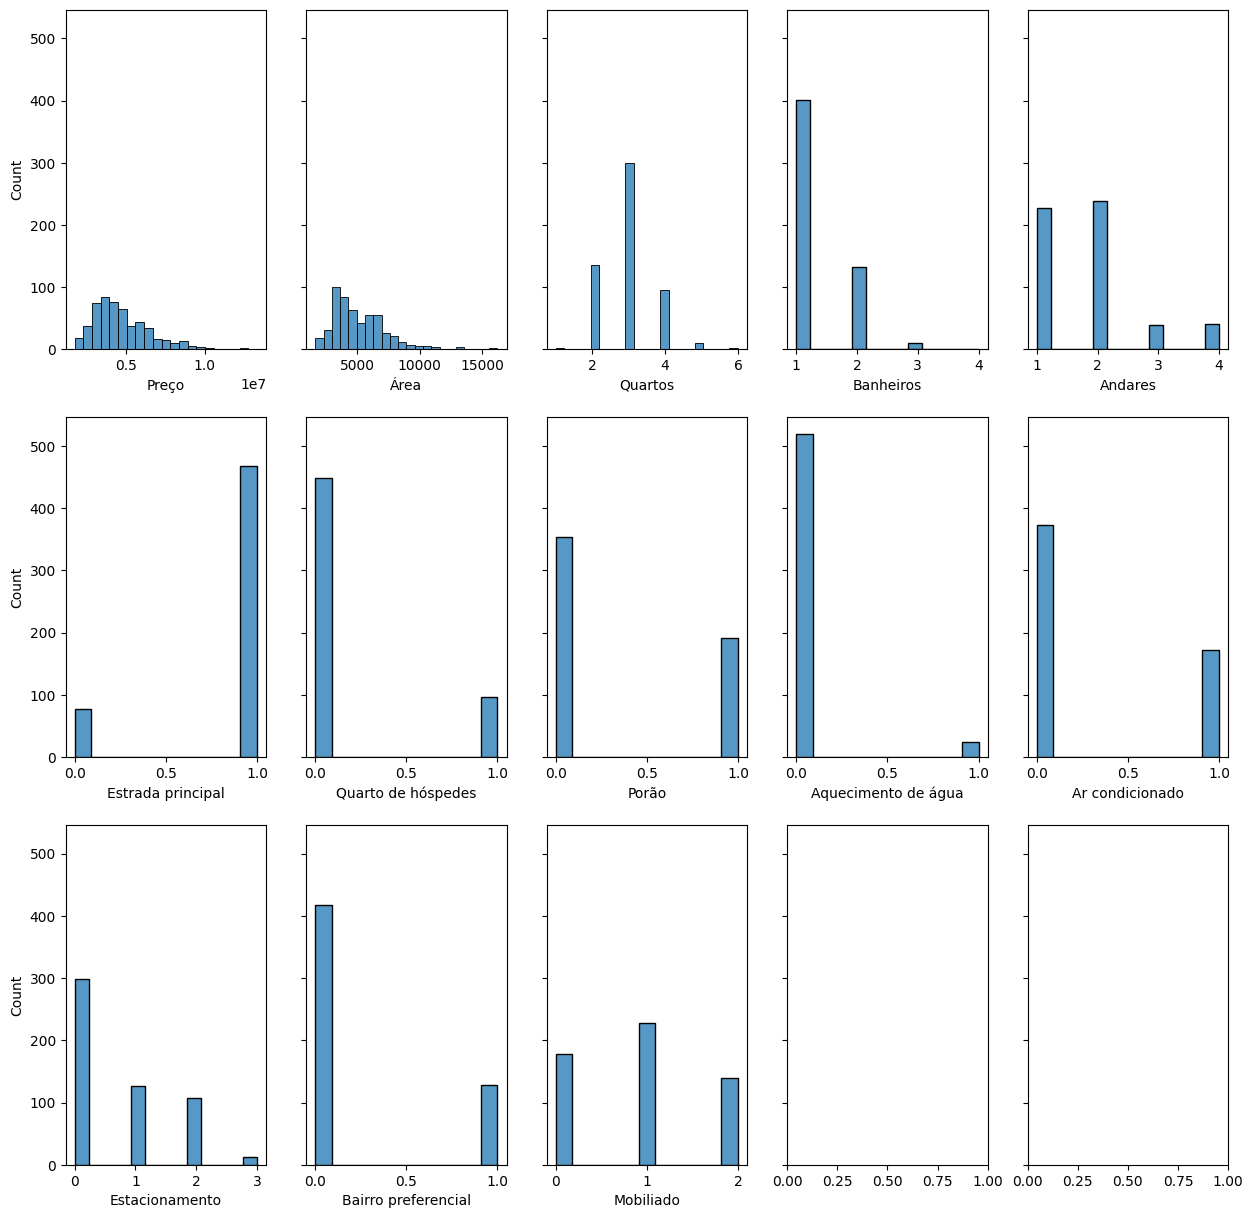

In [13]:
n_cols = 5
n_rows = 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,15), sharey=True)
for i, coluna in enumerate(colunas_numericas):
  sns.histplot(housing_prices_df[coluna],ax=axes[i//n_cols,i%n_cols]);

### Comportamento do target

<Axes: title={'center': 'Preço'}>

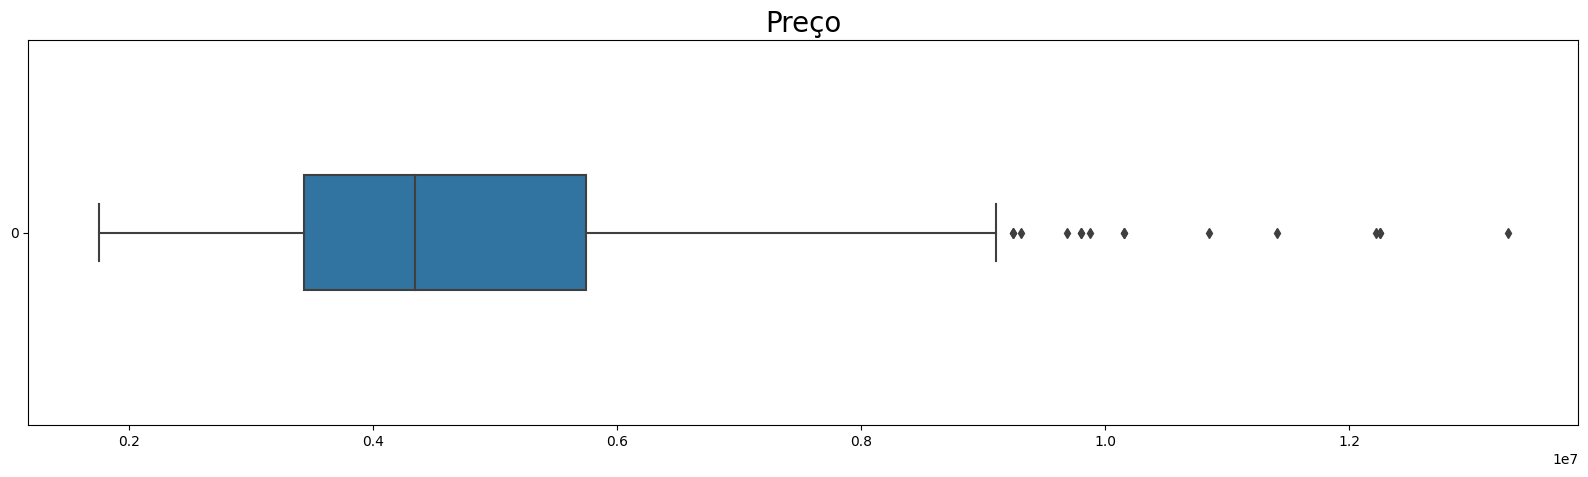

In [14]:
ax = sns.boxplot(data=housing_prices_df['Preço'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço', fontsize=20)
ax

<Axes: title={'center': 'Distribuição de Frequência'}, xlabel='Preço dos Imóveis (R$)', ylabel='Count'>

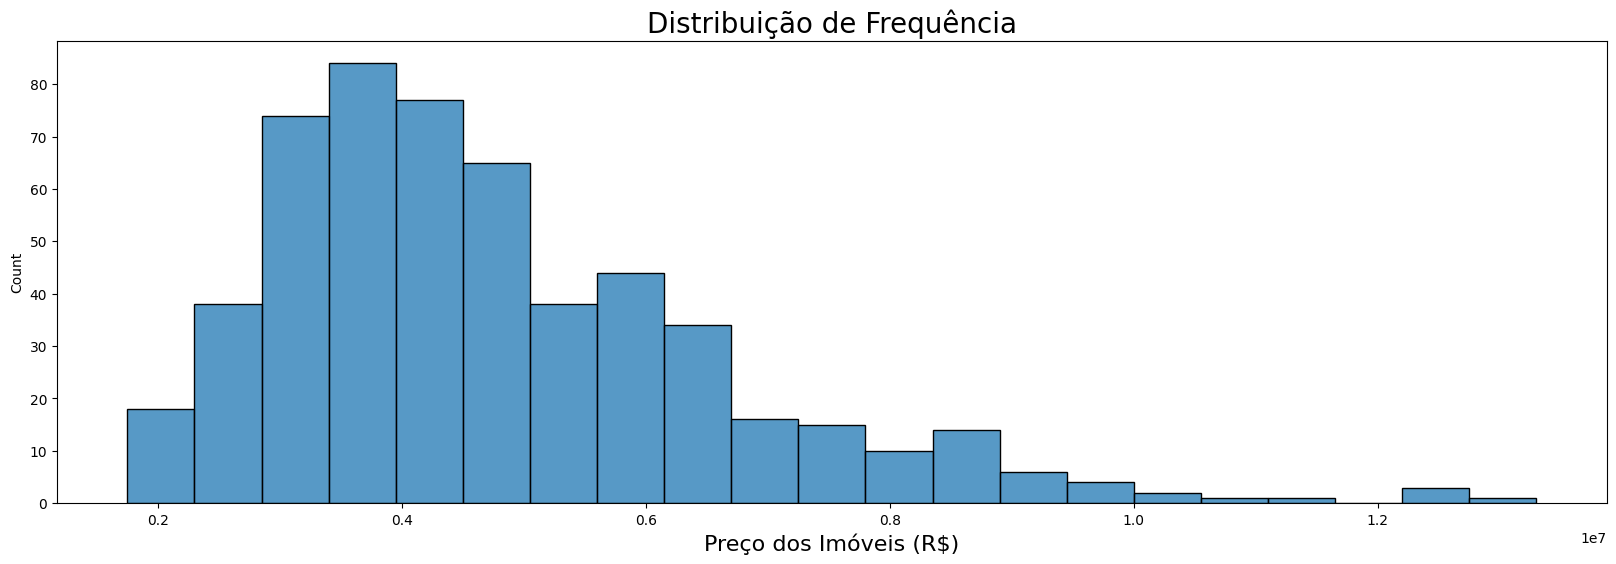

In [15]:
ax = sns.histplot(housing_prices_df['Preço'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

Observamos que:

O tipo da variável que estamos analisando possui esse tipo de comportamento, com uma assimetria à direita/positiva.

Com uma concentração muito alta de imóveis com valores mais baixos e uma concentração muito baixa de imóveis mais caros.

###Verificando a normalidade dos dados

In [16]:
def teste_normalidade(dados):
  stat, p = shapiro(dados)
  print('Estatística=%.3f, p-valor=%.3f' % (stat, p))
  alpha = 0.05
    
  if p > alpha:
    print('A amostra parece ser normal (não podemos rejeitar H0)')
  else:
    print('A amostra não parece ser normal (rejeitamos H0)')

Estatística=0.922, p-valor=0.000
A amostra não parece ser normal (rejeitamos H0)


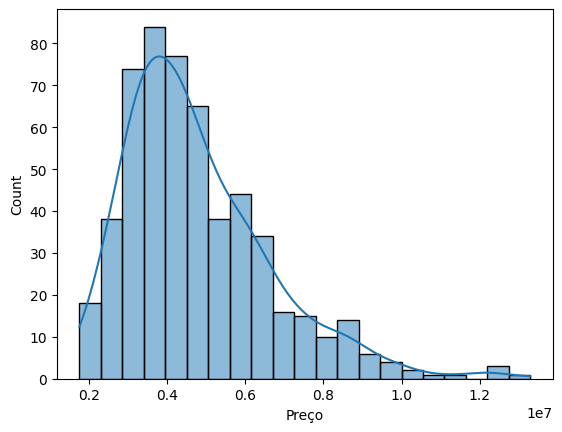

In [17]:
teste_normalidade(housing_prices_df['Preço'])
sns.histplot(housing_prices_df['Preço'], kde=True);

###Aplicando a transformação box-cox:


####Teste com a transformação logarítmica:

Estatística=0.996, p-valor=0.212
A amostra parece ser normal (não podemos rejeitar H0)


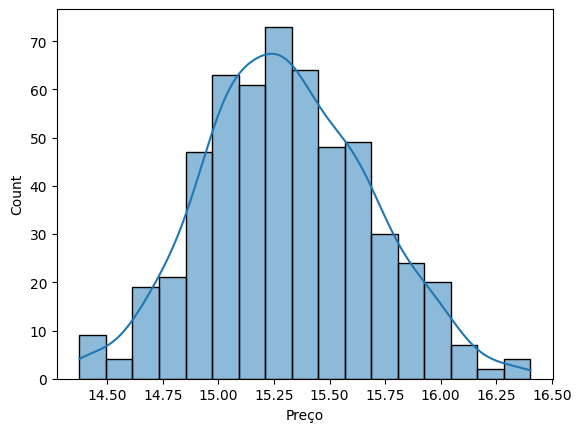

In [18]:
trasnf_log = np.log(housing_prices_df['Preço'])
teste_normalidade(trasnf_log)
sns.histplot(trasnf_log, kde=True);

Após aplicar a transformação logarítimica, confirma-se que os dados seguem a distribuição a normal.

Estatística=0.997, p-valor=0.503
A amostra parece ser normal (não podemos rejeitar H0)


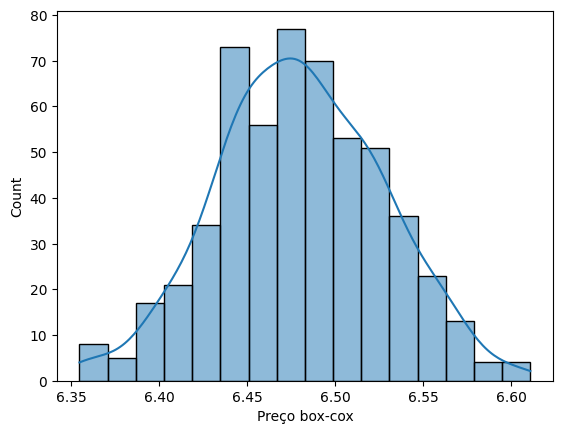

In [19]:
housing_prices_df["Preço box-cox"], _ = boxcox(housing_prices_df['Preço'])
teste_normalidade(housing_prices_df["Preço box-cox"])
sns.histplot(housing_prices_df['Preço box-cox'], kde=True);

Após aplicar a transformação box-cox, confirma-se que os dados seguem a distribuição a normal e, extrai-se valores de normalidade superiores à transformação logarítmica.

###Verificando a correlação das variáveis

<Axes: >

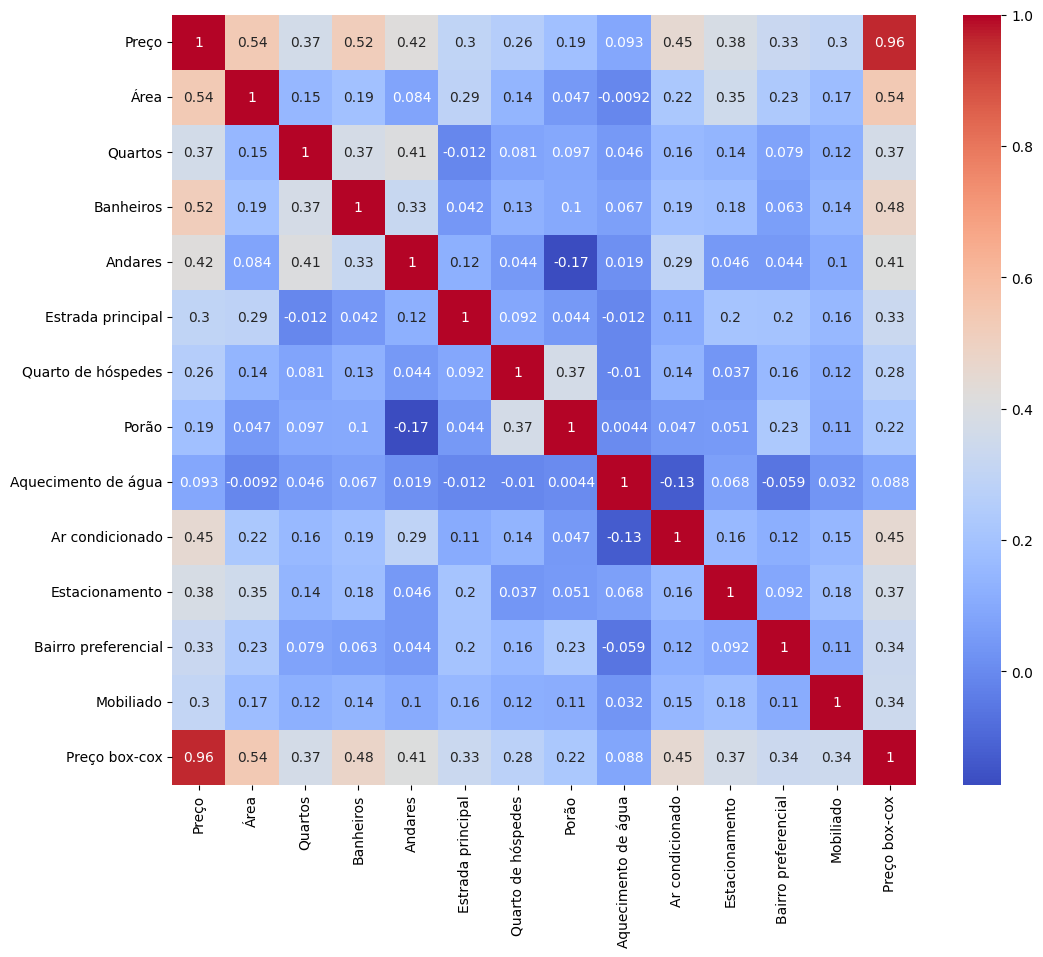

In [20]:
ax = plt.subplots(figsize= (12, 10))
sns.heatmap(housing_prices_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [21]:
# Excluindo Preço
housing_prices_df = housing_prices_df.drop(['Preço'], axis=1)

<Axes: >

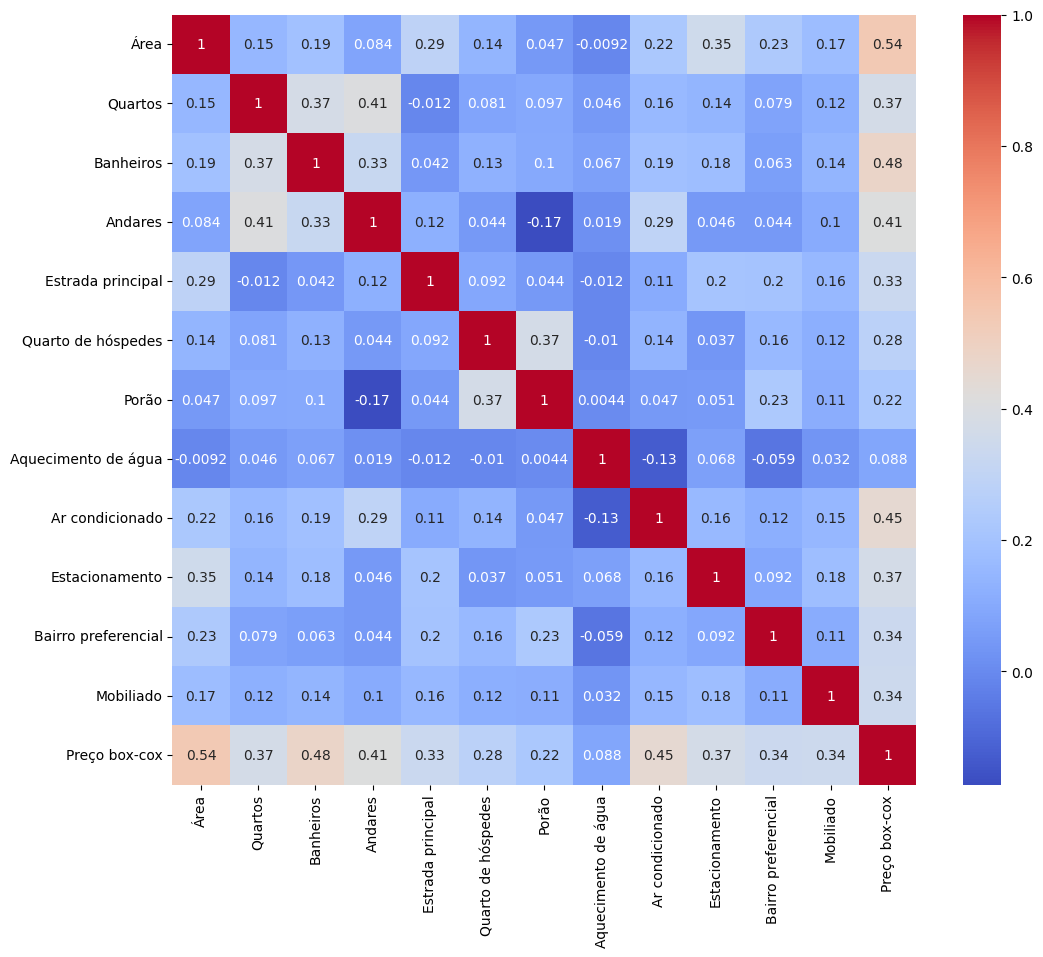

In [22]:
ax = plt.subplots(figsize= (12, 10))
sns.heatmap(housing_prices_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [23]:
#correlação das variáveis com o target
housing_prices_df[housing_prices_df.columns].corr()['Preço box-cox'].sort_values()

Aquecimento de água    0.087791
Porão                  0.221533
Quarto de hóspedes     0.277724
Estrada principal      0.332697
Bairro preferencial    0.340058
Mobiliado              0.341804
Quartos                0.368335
Estacionamento         0.368420
Andares                0.411798
Ar condicionado        0.452585
Banheiros              0.478864
Área                   0.541136
Preço box-cox          1.000000
Name: Preço box-cox, dtype: float64

De modo geral o dataset apresenta variáveis com correlações moderadas com o target, tendo as colunas “Área”, “Banheiros”, “Ar condicionado” e “Andares” como mais influentes. 


###Verificando a dispersão das variáveis

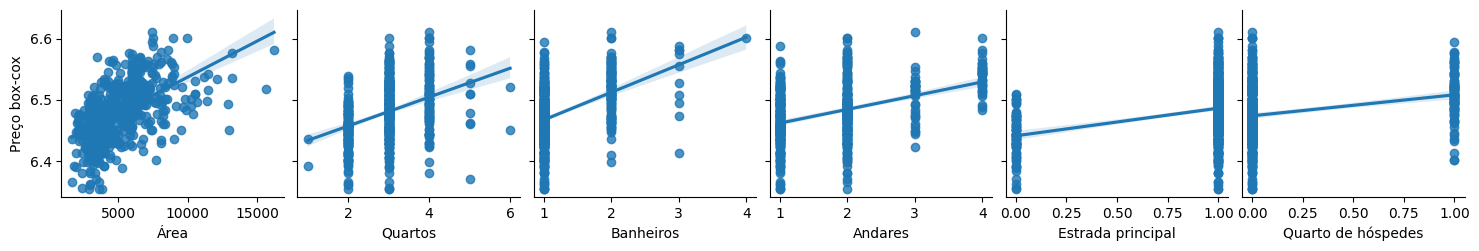

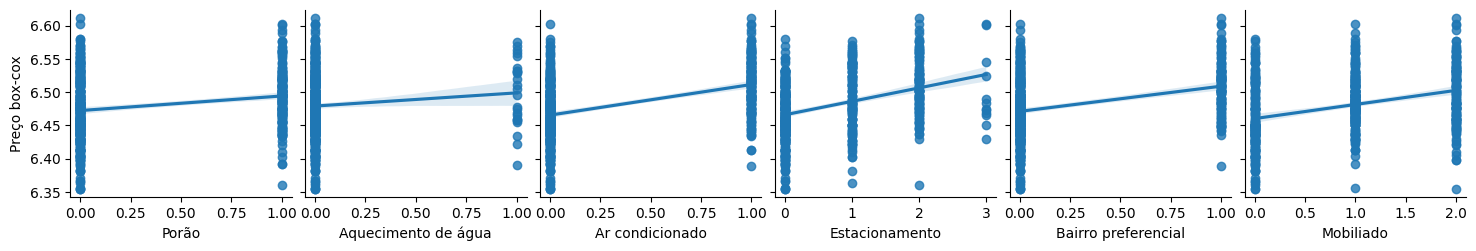

In [24]:
sns.pairplot(data=housing_prices_df, y_vars=['Preço box-cox'], x_vars=colunas_numericas[1:7], kind='reg')
sns.pairplot(data=housing_prices_df, y_vars=['Preço box-cox'], x_vars=colunas_numericas[7:], kind='reg')

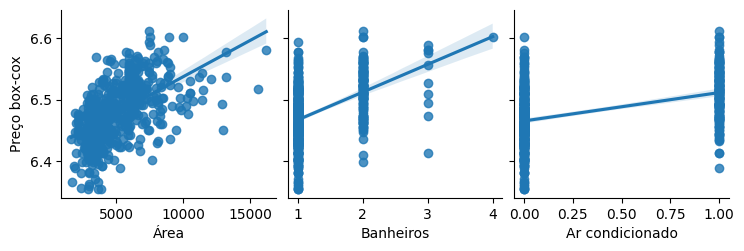

In [25]:
#Destacando os atributos mais correlacionados com o target
sns.pairplot(housing_prices_df, y_vars='Preço box-cox', kind='reg',
            x_vars=['Área', 'Banheiros', 'Ar condicionado'])

Transformação dos dados

In [26]:
#Usando box-cox
housing_prices_df["Área box-cox"], _ = boxcox(housing_prices_df['Área'])

In [27]:
housing_prices_df.columns

Index(['Área', 'Quartos', 'Banheiros', 'Andares', 'Estrada principal',
       'Quarto de hóspedes', 'Porão', 'Aquecimento de água', 'Ar condicionado',
       'Estacionamento', 'Bairro preferencial', 'Mobiliado', 'Preço box-cox',
       'Área box-cox'],
      dtype='object')

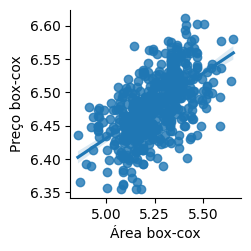

In [28]:
sns.pairplot(housing_prices_df, y_vars='Preço box-cox', kind='reg', 
             x_vars='Área box-cox')

In [29]:
housing_prices_df = housing_prices_df.drop(['Área'], axis=1)
housing_prices_df = housing_prices_df.reset_index(drop=True)

In [30]:
housing_prices_df.columns

Index(['Quartos', 'Banheiros', 'Andares', 'Estrada principal',
       'Quarto de hóspedes', 'Porão', 'Aquecimento de água', 'Ar condicionado',
       'Estacionamento', 'Bairro preferencial', 'Mobiliado', 'Preço box-cox',
       'Área box-cox'],
      dtype='object')

<Axes: >

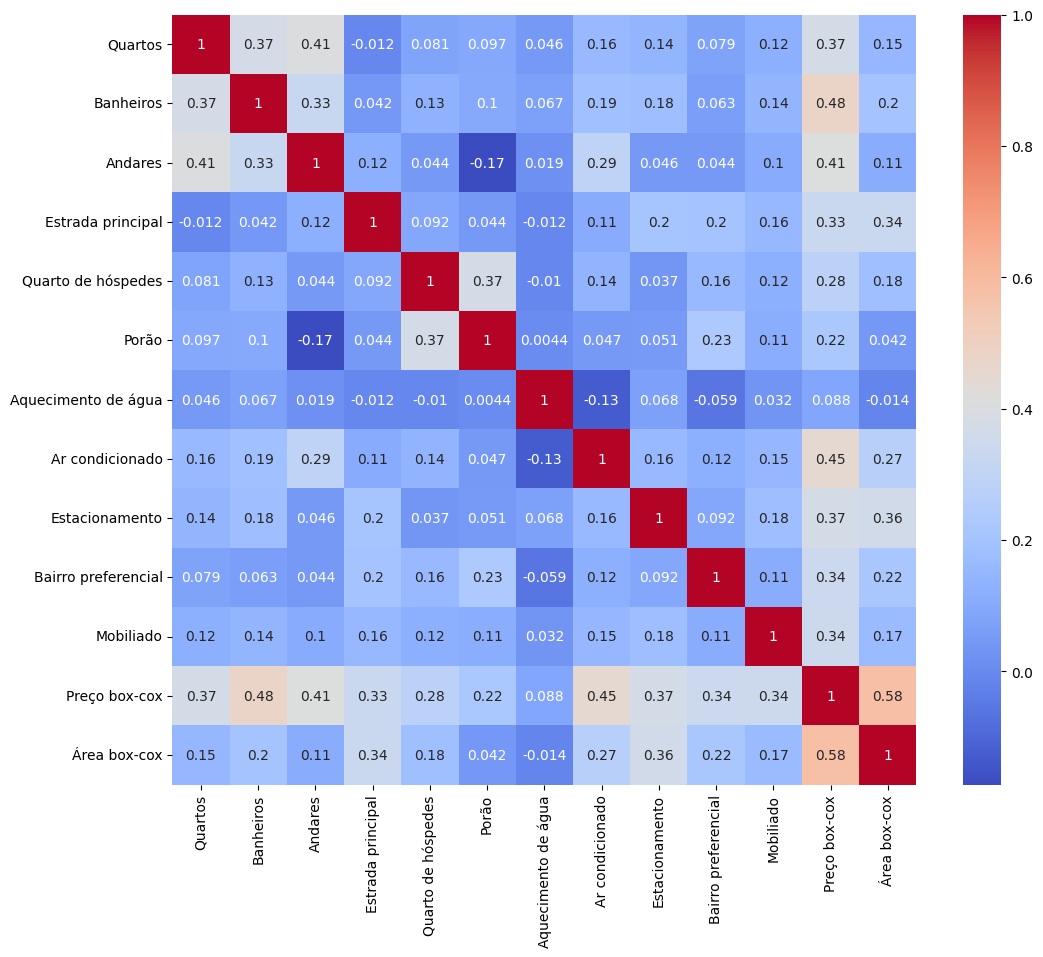

In [31]:
ax = plt.subplots(figsize= (12, 10))
sns.heatmap(housing_prices_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [32]:
#correlação das variáveis com o target
housing_prices_df[housing_prices_df.columns].corr()['Preço box-cox'].sort_values()

Aquecimento de água    0.087791
Porão                  0.221533
Quarto de hóspedes     0.277724
Estrada principal      0.332697
Bairro preferencial    0.340058
Mobiliado              0.341804
Quartos                0.368335
Estacionamento         0.368420
Andares                0.411798
Ar condicionado        0.452585
Banheiros              0.478864
Área box-cox           0.580269
Preço box-cox          1.000000
Name: Preço box-cox, dtype: float64

##Regressão Linear Simples

In [33]:
X = housing_prices_df[['Área box-cox']]
y = housing_prices_df["Preço box-cox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=41)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:          Preço box-cox   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     236.9
Date:                Mon, 01 May 2023   Prob (F-statistic):           3.06e-41
Time:                        01:33:02   Log-Likelihood:                 671.59
No. Observations:                 354   AIC:                            -1339.
Df Residuals:                     352   BIC:                            -1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3953      0.071     76.435   

###Análise de resíduos

In [34]:
#Calculando os resíduos
residuos = modelo_statsmodels.resid
residuos

405   -0.001209
331   -0.048145
388   -0.013304
325    0.008375
22     0.041905
         ...   
469   -0.050505
407    0.026730
243    0.048192
321    0.005314
80     0.030872
Length: 354, dtype: float64

###Linearidade

Text(0.5, 0, 'Área box-cox')

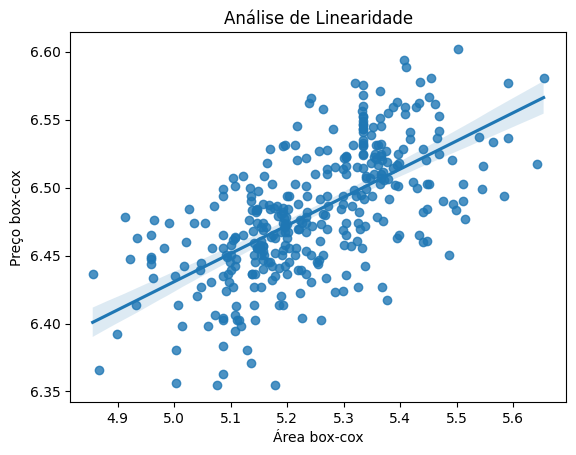

In [35]:
ax = sns.regplot(x=X_train["Área box-cox"], y=y_train)
ax.set_title("Análise de Linearidade")
plt.ylabel('Preço box-cox')
plt.xlabel('Área box-cox')

###Normalidade

<Axes: ylabel='Count'>

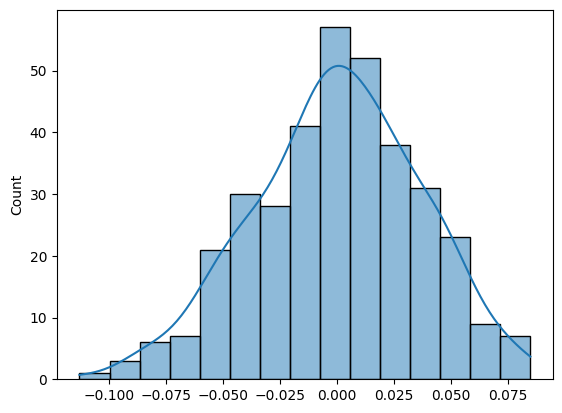

In [36]:
sns.histplot(residuos, kde=True)

###Homocedasticidade

In [37]:
# Teste de Breusch-Pagan para verificar homocedasticidade dos resíduos
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(residuos, modelo_statsmodels.model.exog)

# Teste de white
resultado_teste_white = smd.het_white(residuos, modelo_statsmodels.model.exog)

# Imprime o valor-p associado ao teste
print('Valor-p do teste de Breusch-Pagan:', p_value)
print('Valor-p do teste de White:', resultado_teste_white[1])

Valor-p do teste de Breusch-Pagan: 0.36442824087997105
Valor-p do teste de White: 0.502774727862576


Text(0.5, 0, 'Área box-cox')

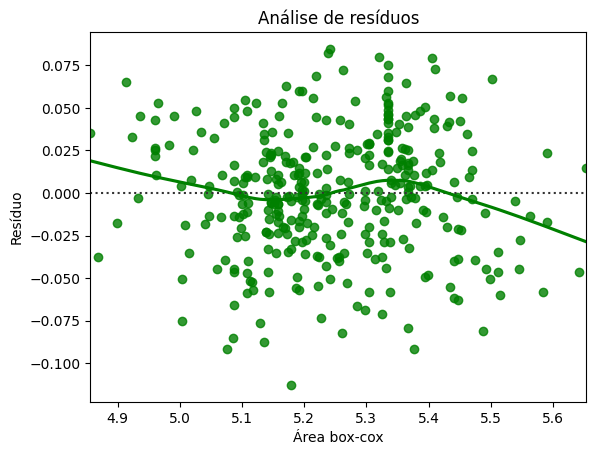

In [38]:
ax_residual = sns.residplot(x=X_train["Área box-cox"], y=residuos, lowess=True, color="g")
ax_residual.set_title("Análise de resíduos")
plt.ylabel('Resíduo')
plt.xlabel('Área box-cox')

##Regressão Linear Múltipla

In [39]:
y = housing_prices_df['Preço box-cox']
X = housing_prices_df[['Área box-cox', 'Banheiros', 'Ar condicionado']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state= 41)
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels_multi_1 = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels_multi_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Preço box-cox   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     169.2
Date:                Mon, 01 May 2023   Prob (F-statistic):           9.15e-68
Time:                        01:33:07   Log-Likelihood:                 739.10
No. Observations:                 354   AIC:                            -1470.
Df Residuals:                     350   BIC:                            -1455.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.5908      0.061     

<Axes: ylabel='Count'>

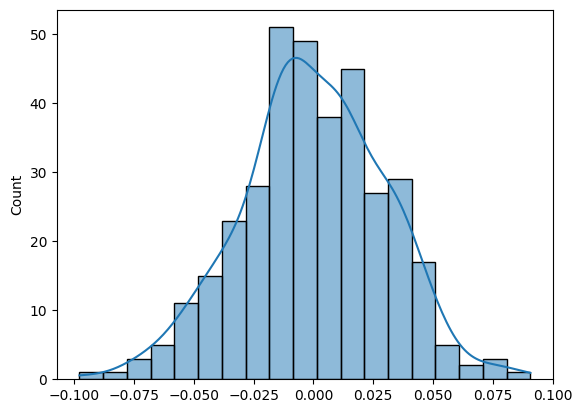

In [40]:
sns.histplot(modelo_statsmodels_multi_1.resid, kde=True)

In [41]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [42]:
np.exp(modelo.intercept_)

267.9374082365154

Visualizando Valor estimado x Real

In [43]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Box-cox do Preço - Previsão', ylabel='Box-cox do Preço - Real'>

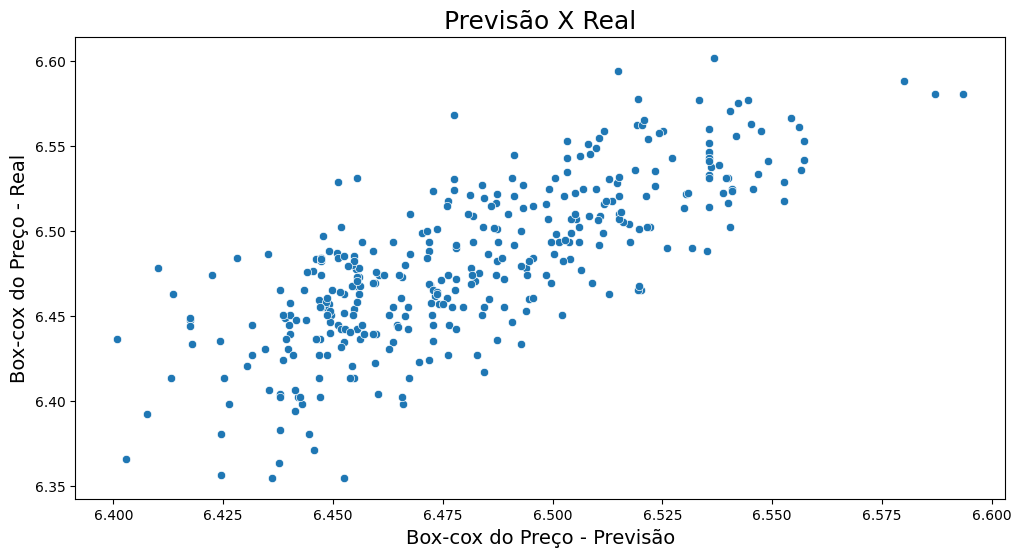

In [52]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Box-cox do Preço - Previsão', fontsize=14)
ax.set_ylabel('Box-cox do Preço - Real', fontsize=14)
ax

##Árvore de regressão

In [45]:
X = housing_prices_df[['Área box-cox']]
y = housing_prices_df["Preço box-cox"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=41)
X_train_com_constante = sm.add_constant(X_train)

In [53]:
dt_regressor = DecisionTreeRegressor(random_state = 41)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=41)

In [54]:
#Training Accuracy
y_pred_train = dt_regressor.predict(X_train)
r2_score(y_train, y_pred_train)

0.8287642949221667

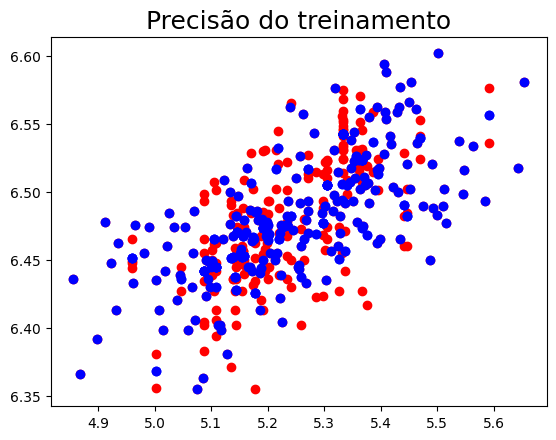

In [55]:
#Visualizing Training Accuracy
fig, ax = plt.subplots()
ax.set_title('Precisão do treinamento', fontsize=18)
ax.scatter(X_train,y_train, color = "red")
ax.scatter(X_train,y_pred_train, color = "blue")

In [49]:
#Testing Accuracy
y_pred = dt_regressor.predict(X_test)
r2_score(y_test, y_pred)

-0.17163600485079322

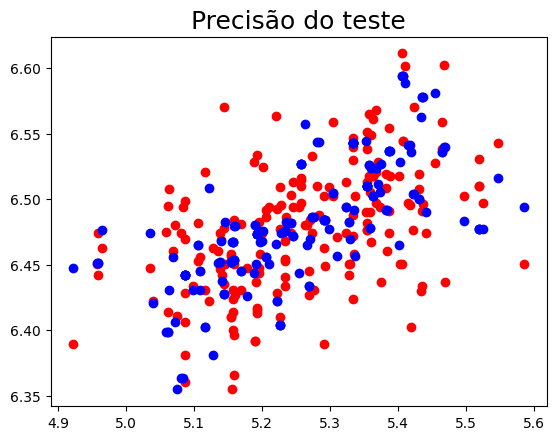

In [50]:
#Visualizing Testing Accuracy
fig, ax = plt.subplots()
ax.set_title('Precisão do teste', fontsize=18)
ax.scatter(X_test,y_test, color = "red")
ax.scatter(X_test,y_pred, color = "blue")

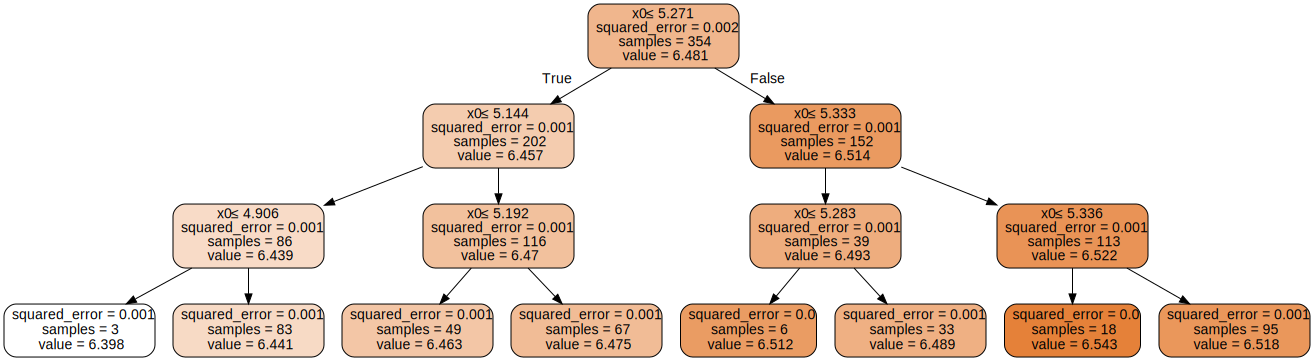

In [58]:
dt_regressor = tree.DecisionTreeRegressor(max_depth=3)
dt_regressor.fit(X_train, y_train)

dot_data = tree.export_graphviz(dt_regressor, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph